In [1]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt


folder_dir = 'D:\\M.Sc. DSSA\\SEM 2\\Machine learning\\PROJECT'

In [2]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

In [3]:
len(label)

2107

In [4]:
data_arr = np.array(data)
label_arr = np.array(label)

In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [7]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

In [8]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [9]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=70
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

C:\Users\NAVYA\anaconda3\anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\NAVYA\AppData\Local\Temp/ipykernel_12992/3114741540.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),


Epoch 1/70
53/53 [==============================] - 198s 4s/step - loss: 1.3355 - accuracy: 0.3935 - val_loss: 1.0999 - val_accuracy: 0.5284
Epoch 2/70
53/53 [==============================] - 234s 4s/step - loss: 1.1236 - accuracy: 0.5561 - val_loss: 1.0350 - val_accuracy: 0.5948
Epoch 3/70
53/53 [==============================] - 216s 4s/step - loss: 1.0374 - accuracy: 0.6154 - val_loss: 1.0385 - val_accuracy: 0.5545
Epoch 4/70
53/53 [==============================] - 215s 4s/step - loss: 0.9923 - accuracy: 0.6398 - val_loss: 0.9486 - val_accuracy: 0.6114
Epoch 5/70
53/53 [==============================] - 216s 4s/step - loss: 0.9726 - accuracy: 0.6392 - val_loss: 0.9903 - val_accuracy: 0.6137
Epoch 6/70
53/53 [==============================] - 218s 4s/step - loss: 0.9658 - accuracy: 0.6540 - val_loss: 0.9244 - val_accuracy: 0.6493
Epoch 7/70
53/53 [==============================] - 213s 4s/step - loss: 0.9451 - accuracy: 0.6504 - val_loss: 0.9575 - val_accuracy: 0.6303
Epoch 8/70
53

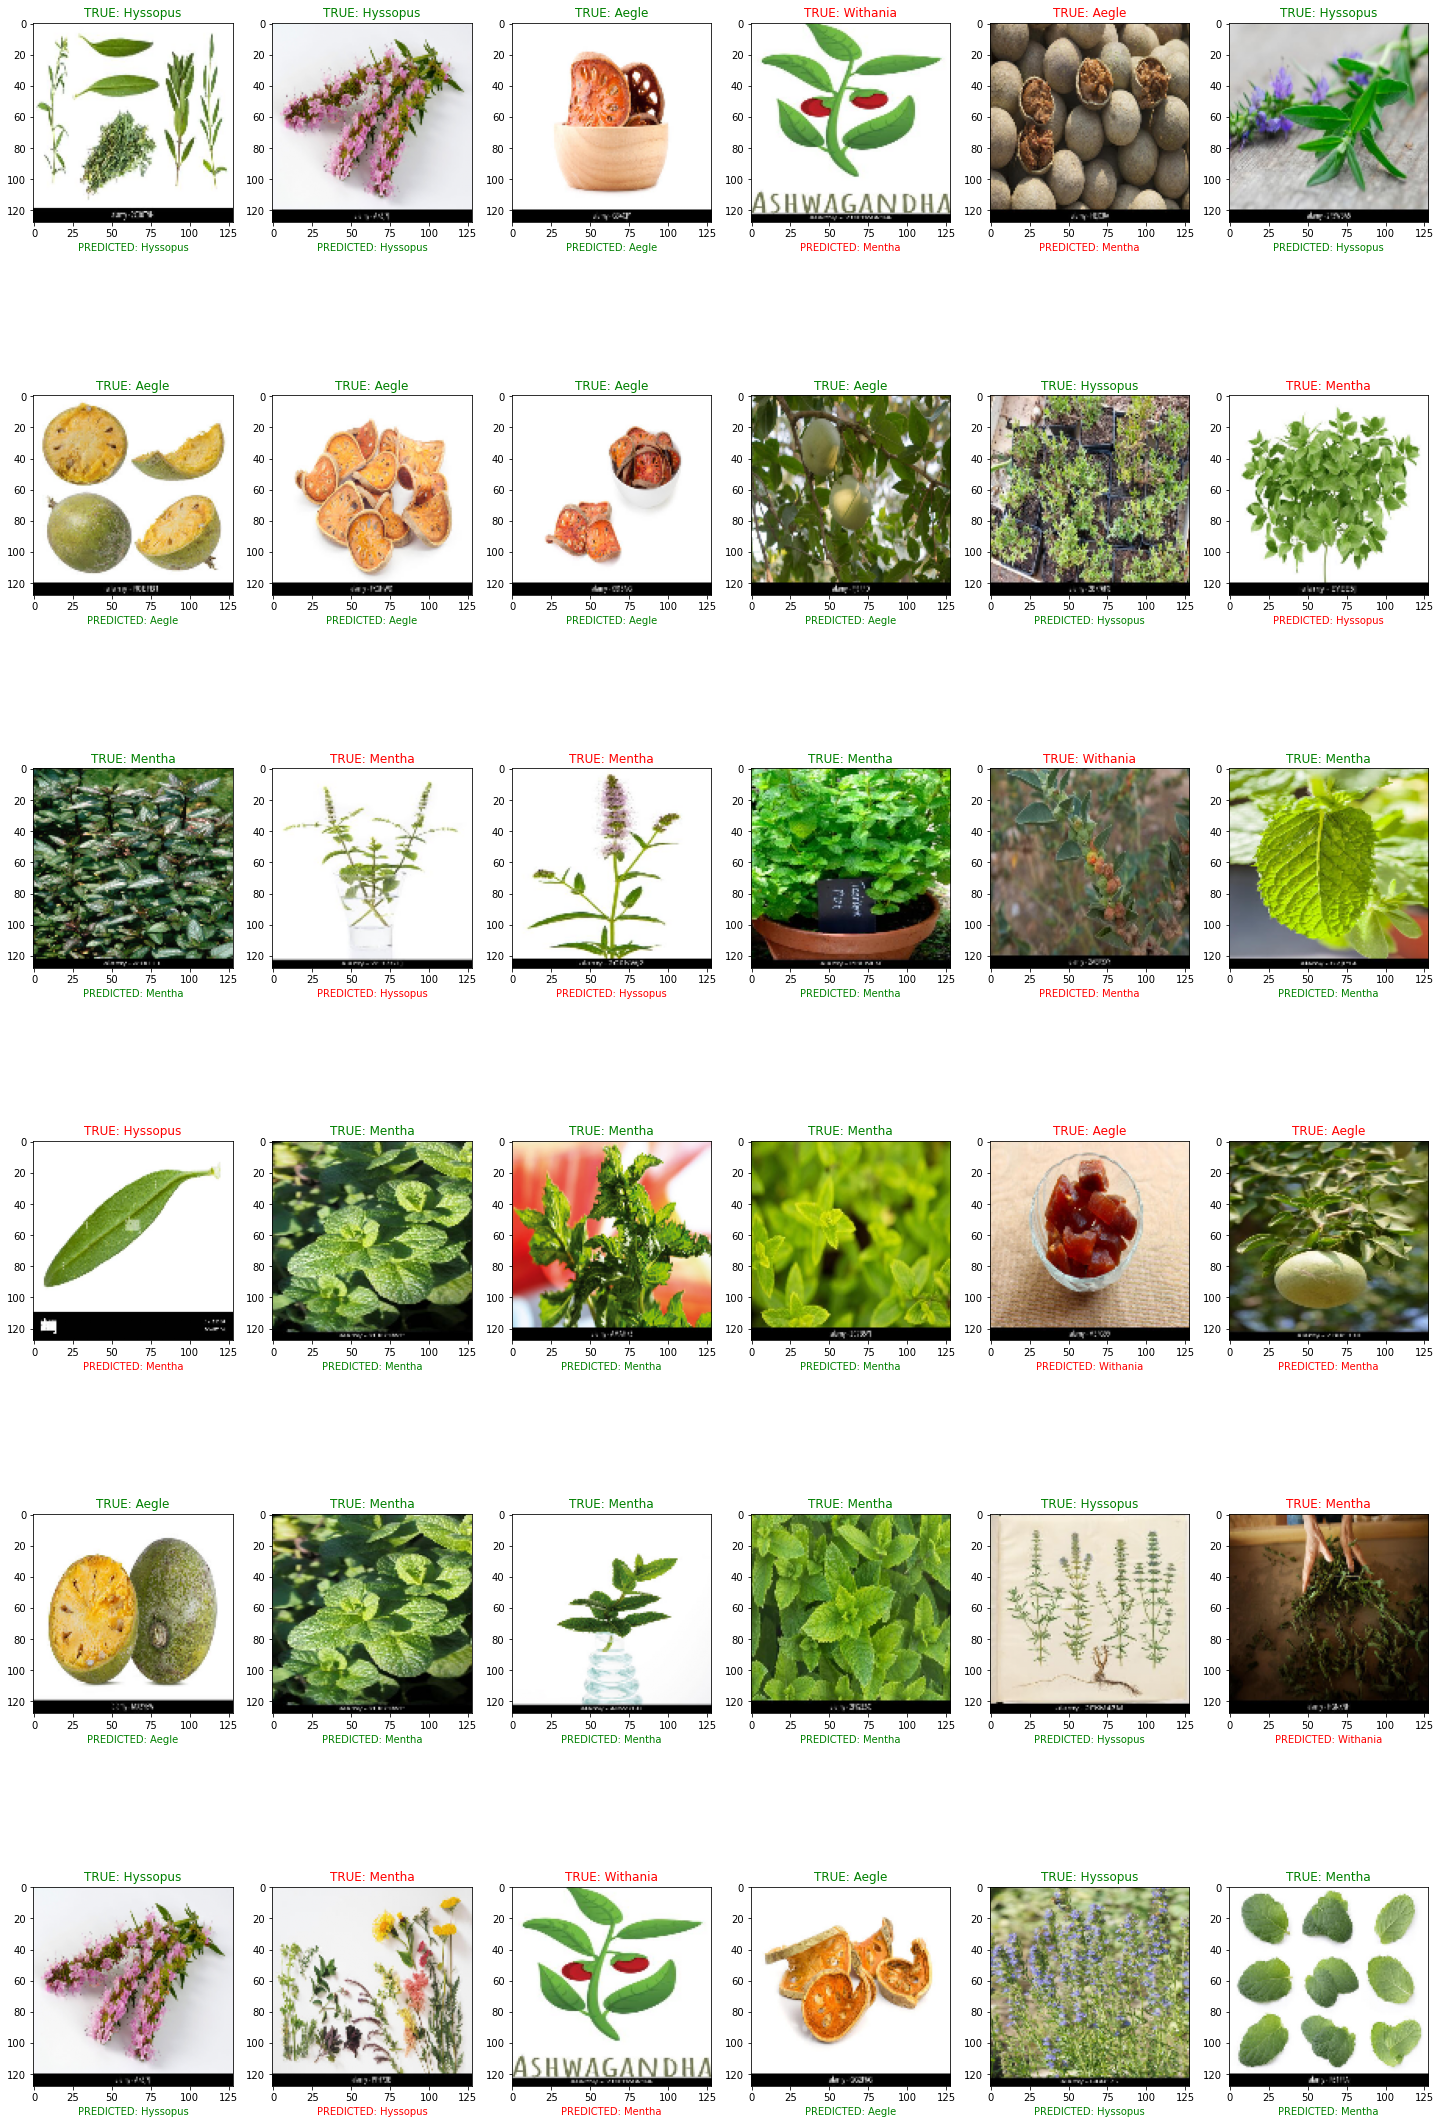

In [10]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

In [14]:
print("Model Accuracy")
scores = model.evaluate(X_test,y_test)
print(f"Test Accuracy:{scores[1]*100}")

Model Accuracy
14/14 [==============================] - 11s 760ms/step - loss: 0.7831 - accuracy: 0.7393
Test Accuracy:73.93364906311035


In [16]:
import os
print(os.getcwd())

C:\Users\NAVYA\Machine Leaning


In [9]:
from tensorflow.keras.models import model_from_json
model_in_json = model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_in_json)

In [10]:
model_file=open('model.json','r')
json_model=model_file.read()
model2=model_from_json(json_model)

In [12]:
scores = model2.evaluate(X_test,y_test)
print(f"Test Accuracy:{scores[1]*100}")

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.